<a href="https://colab.research.google.com/github/IngridDirckx/Datafiles-eindopdracht/blob/main/Eindopdracht_vraag_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Imports**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


### **DataFrames**

In [ ]:
df_co2 = pd.read_csv('https://raw.githubusercontent.com/IngridDirckx/co2-vraag-1/main/co-emissions-per-capita.csv', sep=",")
df_energy = pd.read_csv('https://raw.githubusercontent.com/IngridDirckx/Datafiles-eindopdracht/main/per-capita-energy-use.csv')
df_gdp = pd.read_csv('https://raw.githubusercontent.com/IngridDirckx/Datafiles-eindopdracht/main/gdp-per-capita-maddison.csv')
df_food = pd.read_csv('https://raw.githubusercontent.com/IngridDirckx/Datafiles-eindopdracht/main/dietary-compositions-by-commodity-group.csv', sep=",")
df_cars = pd.read_csv('https://raw.githubusercontent.com/IngridDirckx/Datafiles-eindopdracht/main/registered-vehicles-per-1000-people.csv')

In [ ]:
print('df_country_co2')
print(df_co2.head())

print('\n\ndf_energy')
print(df_energy.head())

print('\n\ndf_gdp')
print(df_gdp.head())

print('\n\ndf_food')
print(df_food.head())

print('\n\ndf_cars')
print(df_cars.head())

df_country_co2
        Entity Code  Year  Annual CO₂ emissions (per capita)
0  Afghanistan  AFG  1949                           0.001992
1  Afghanistan  AFG  1950                           0.011266
2  Afghanistan  AFG  1951                           0.012098
3  Afghanistan  AFG  1952                           0.011946
4  Afghanistan  AFG  1953                           0.013685


df_energy
        Entity Code  Year  Primary energy consumption per capita (kWh/person)
0  Afghanistan  AFG  1980                                          623.92865 
1  Afghanistan  AFG  1981                                          786.83690 
2  Afghanistan  AFG  1982                                          926.65125 
3  Afghanistan  AFG  1983                                         1149.19590 
4  Afghanistan  AFG  1984                                         1121.57290 


df_gdp
        Entity Code  Year  GDP per capita 417485-annotations
0  Afghanistan  AFG  1950          1156.0                NaN
1  Afgha

In [ ]:
# van de geimporteerde files alleen de benodigde kolommen selecteren
# van de geimporteerde files de kolomnamen wijzigen
df_co2_processed = df_co2[['Entity', 'Year', 'Annual CO₂ emissions (per capita)']].rename(columns={'Entity': 'Country', 'Annual CO₂ emissions (per capita)': 'CO2_emissions'})
df_energy_processed = df_energy[['Entity', 'Year', 'Primary energy consumption per capita (kWh/person)']].rename(columns={'Entity': 'Country', 'Primary energy consumption per capita (kWh/person)': 'Energy_consumption'})
df_gdp_processed = df_gdp[['Entity', 'Year', 'GDP per capita']].rename(columns={'Entity': 'Country', 'GDP per capita': 'GDP'})
df_food_processed = df_food.drop(columns=['Code', 'Daily caloric intake per person from other commodities', 'Daily caloric intake per person from alcoholic beverages', 'Daily caloric intake per person from sugar', \
                               'Daily caloric intake per person from oils and fats', 'Daily caloric intake per person from fruits and vegetables', 'Daily caloric intake per person from starchy roots',\
                               'Daily caloric intake per person from pulses', 'Daily caloric intake per person from cereals and grains']).rename(columns={'Entity': 'country'}).rename(columns={'Year': 'year', 'Daily caloric intake per person from meat': 'meat', 'Daily caloric intake per person from dairy and eggs': 'dairy_eggs'})
df_cars_processed = df_cars[['Entity', 'Year', 'Registered vehicles per 1,000 people']].rename(columns={'Entity': 'Country', 'Registered vehicles per 1,000 people': 'Vehicles'})

In [ ]:
#controleren of kolom selectie en wijzigingen van de kolomtitel goed is gegaan
print('df_country_co2_processed')
print(df_co2_processed.head())

print('\n\ndf_energy')
print(df_energy_processed.head())

print('\n\ndf_gdp_processed')
print(df_gdp_processed.head())

print('\n\ndf_food_processed')
print(df_food_processed.head())

print('\n\ndf_cars_processed')
print(df_cars_processed.head())

df_country_co2_processed
       Country  Year  CO2_emissions
0  Afghanistan  1949       0.001992
1  Afghanistan  1950       0.011266
2  Afghanistan  1951       0.012098
3  Afghanistan  1952       0.011946
4  Afghanistan  1953       0.013685


df_energy
       Country  Year  Energy_consumption
0  Afghanistan  1980           623.92865
1  Afghanistan  1981           786.83690
2  Afghanistan  1982           926.65125
3  Afghanistan  1983          1149.19590
4  Afghanistan  1984          1121.57290


df_gdp_processed
       Country  Year     GDP
0  Afghanistan  1950  1156.0
1  Afghanistan  1951  1170.0
2  Afghanistan  1952  1189.0
3  Afghanistan  1953  1240.0
4  Afghanistan  1954  1245.0


df_food_processed
       country  year      meat  dairy_eggs
0  Afghanistan  1961  90.65908  103.901410
1  Afghanistan  1962  90.71613  102.947525
2  Afghanistan  1963  92.81392  112.192650
3  Afghanistan  1964  94.90354  112.251495
4  Afghanistan  1965  96.98485  120.465385


df_cars_processed
          

In [ ]:
#alle hoofdletters in de kolomnamen aanpassen naar kleine letters
df_co2_processed.columns = df_co2_processed.columns.str.lower()
df_energy_processed.columns = df_energy_processed.columns.str.lower()
df_gdp_processed.columns = df_gdp_processed.columns.str.lower()
df_food_processed.columns = df_food_processed.columns.str.lower()
df_cars_processed.columns = df_cars_processed.columns.str.lower()

In [ ]:
#controleren of alles in kleine letters staat
print('column names of df_co2_processed')
print(df_co2_processed.columns)

print('\ncolumn names of df_energy_processed')
print(df_energy_processed.columns)

print('\ncolumn names of df_gdp_processed')
print(df_gdp_processed.columns)

print('\ncolumn names of df_food_processed')
print(df_food_processed.columns)

print('\ncolumn names of df_cars_processed')
print(df_cars_processed.columns)

column names of df_co2_processed
Index(['country', 'year', 'co2_emissions'], dtype='object')

column names of df_energy_processed
Index(['country', 'year', 'energy_consumption'], dtype='object')

column names of df_gdp_processed
Index(['country', 'year', 'gdp'], dtype='object')

column names of df_food_processed
Index(['country', 'year', 'meat', 'dairy_eggs'], dtype='object')

column names of df_cars_processed
Index(['country', 'year', 'vehicles'], dtype='object')


In [ ]:
# Alle tabellen hebben rijen die geen land zijn.
# een variabele maken die gebruikt kan worden om deze rijen te verwijderen in alle files
no_country_entities = ['World', 'Europe', 'Africa', 'Oceania', 'North America','High-income countries', 'Europe (excl. EU-28)', 'Europe (excl. EU-27)', 'Upper-middle-income countries', 'Asia', 'Asia (excl. China and India)', 'European Union (27)', 'European Union (28)', 'Low-income countries', 'Lower-middle-income countries', 'South America' ]
#rijen verwijderen uit de verschillende dataframes
df_co2_processed = df_co2_processed[~df_co2_processed['country'].isin(no_country_entities)]
df_energy_processed = df_energy_processed[~df_energy_processed['country'].isin(no_country_entities)]
df_gdp_processed = df_gdp_processed[~df_gdp_processed['country'].isin(no_country_entities)]
df_food_processed = df_food_processed[~df_food_processed['country'].isin(no_country_entities)]
df_cars_processed = df_cars_processed[~df_cars_processed['country'].isin(no_country_entities)]

In [ ]:
# alle rijen verwijderen uit alle files van jaartallen voor 2010
df_co2_processed = df_co2_processed[df_co2_processed['year'] >= 2010]
df_energy_processed = df_energy_processed[df_energy_processed['year'] >= 2010]
df_gdp_processed = df_gdp_processed[df_gdp_processed['year'] >= 2010]
df_food_processed = df_food_processed[df_food_processed['year'] >= 2010]
df_cars_processed = df_cars_processed[df_cars_processed['year'] >= 2010]

In [ ]:
#in het dataframe df_food_processed een kolom toevoegen met het totaal van "meat" en "dairy producten" --> consumptie van dierlijke producten
df_food_processed['food_livestock'] = df_food_processed['meat'] + df_food_processed['dairy_eggs']
df_food_processed = df_food_processed.drop(columns=['meat', 'dairy_eggs'])

In [ ]:
# uit het dataframe co2 een top 10 maken van de landen met de grootste uitstoot per capita in het jaar 2022
df_co2_top10_2022 = df_co2_processed[df_co2_processed['year'] == 2022].sort_values(by='co2_emissions', ascending=False).head(10)

In [ ]:
#controle lijst van top 10 landen
print('df_co2_top10_2022')
df_co2_top10_2022

df_co2_top10_2022


,country,year,co2_emissions
19631,Qatar,2022,37.601273
24827,United Arab Emirates,2022,25.833244
2495,Bahrain,2022,25.672274
13107,Kuwait,2022,25.578102
4225,Brunei,2022,23.950201
23839,Trinidad and Tobago,2022,22.423758
20576,Saudi Arabia,2022,18.197495
16741,New Caledonia,2022,17.641167
18375,Oman,2022,15.730261
1964,Australia,2022,14.985412


In [ ]:
# van de dataframes hoeven alleen de rijden te worden geselecteerd van de landen die in de top 10 staan
df_co2_processed = df_co2_processed[df_co2_processed['country'].isin(df_co2_top10_2022['country'])]
df_energy_processed = df_energy_processed[df_energy_processed['country'].isin(df_co2_top10_2022['country'])]
df_gdp_processed = df_gdp_processed[df_gdp_processed['country'].isin(df_co2_top10_2022['country'])]
df_food_processed = df_food_processed[df_food_processed['country'].isin(df_co2_top10_2022['country'])]
df_cars_processed = df_cars_processed[df_cars_processed['country'].isin(df_co2_top10_2022['country'])]

In [ ]:
#alle dataframes zijn nu klaar voor de analyse
#het dataframe CO2 emissie wordt geplot tegen de waarden van de mogelijke voorspellers (cars, food_livestock, GDP, primaiere energy consumption
# functie om alle potentiele voorstellers af te zetten tegen de waarden van CO2 emissie per capita
def plot_relationship(df, x_col, y_col):
    x = df[x_col]
    y = df[y_col]
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(x, y, alpha=0.6, edgecolors='w', s=80)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Scatterplot of {x_col} vs {y_col}')

    slope, intercept, r_value, _, _ = linregress(x, y)
    plt.plot(x, intercept + slope*x, 'r', label=f'y={slope:.5f}x+{intercept:.2f}\nR={r_value:.2f}')
    plt.legend()

    plt.tight_layout()
    plt.show()

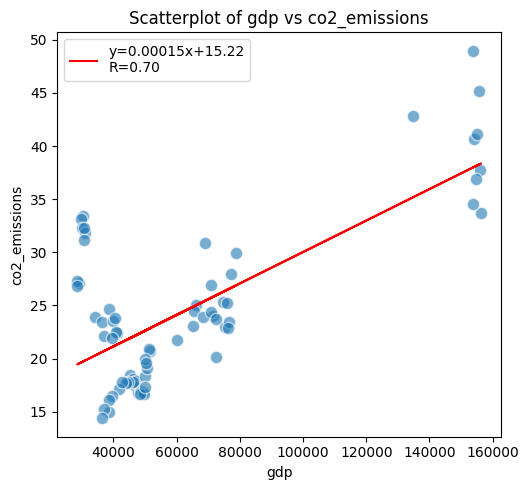

In [ ]:
#scattorplot en regressielijn GDP versus CO2 emissie
top10_country_gdp = df_gdp_processed.merge(df_co2_processed, on=['country', 'year'])
plot_relationship(top10_country_gdp, 'gdp', 'co2_emissions')

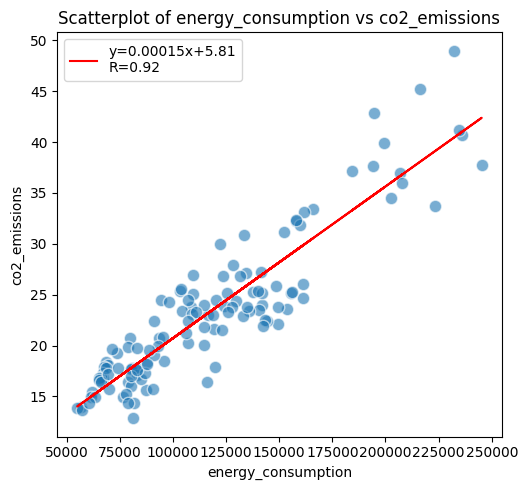

In [ ]:
#scattorplot en regressielijn primaire energieconsumptie versus CO2 emissie
top10_country_energy = df_energy_processed.merge(df_co2_processed, on=['country', 'year'], how='inner')
plot_relationship(top10_country_energy, 'energy_consumption', 'co2_emissions')

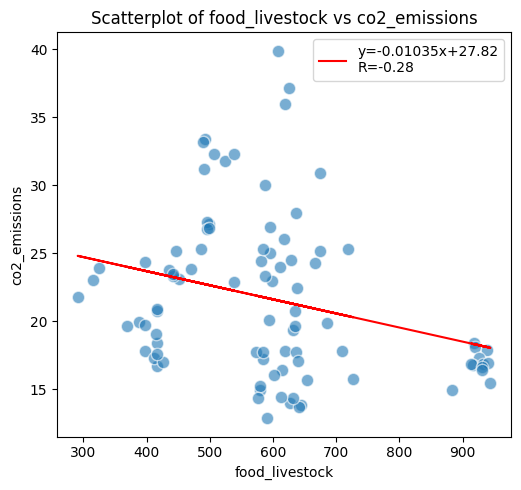

In [ ]:
#scattorplot en regressielijn dierlijke producten versus CO2 emissie
top10_country_food = df_food_processed.merge(df_co2_processed, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')
plot_relationship(top10_country_food, 'food_livestock', 'co2_emissions')

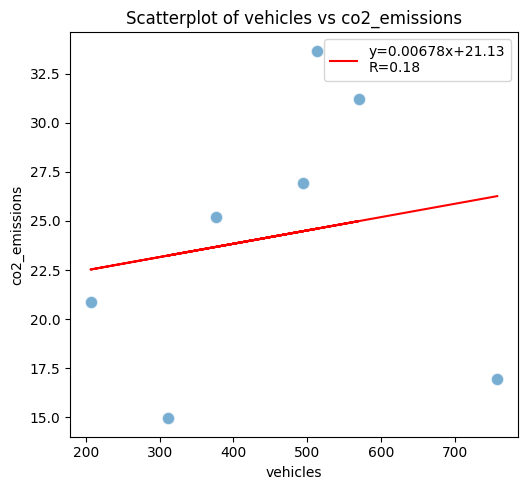

In [ ]:
#scattorplot en regressielijn egistreerde autos versus CO2 emissie
top10_country_cars = df_cars_processed.merge(df_co2_processed, on=['country', 'year'], how='inner')
plot_relationship(top10_country_cars, 'vehicles', 'co2_emissions')